# Credit Card Fraud Detection Project

**Description:** <br>
In the project, we will analyze a real-world dataset on credit card fraud detection from the online dataset from Kaggle. 
<br>(Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)

**Context:**<br>
Credit card companies aim to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

**Content:**<br>
The dataset contains transactions made by credit cards in September 2013 by european cardholders.
Transactions occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, as the positive class (frauds) account for 0.172% of all transactions. <br>

It contains numerical input variables V1-V28 which are the result of a Principal Component Analysis (PCA) transformation, as original features are not provided due to confidentiality issues. Features that have not been transformed with PCA are 'Time' and 'Amount'. 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 'Amount' denotes the transaction Amount. 'Class' is the response variable (labelled outcome) and it takes value 1 in case of fraud and 0 otherwise.  
<br>

Created by Titat Uttawat <br>
P.S. This notebook has been adapt from one of the City University of Hong Kong's SDSC2001 coursework

### Module 1: Data Exploration
First, we will load `creditcard.csv` from the specified URL and then split into `creditcard_train.csv` and `creditcard_test.csv`. We examine the train dataset. We need to check its structure and identify any missing values. What approach should we take for handling missing data—should we remove it or use imputation techniques?

Next, we will look for outliers in the dataset. How should we address these outliers? Options include removing them or analyzing their impact on our models. <br>


We will follow the class guideline for removal of extreme outliers: samples that fall below Q1 - 2.5 * IQR or larger than Q3 + 2.5 * IQR.

In [1]:
# import libralies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('creditcard_train.csv')
print(f'total transaction: {df.shape[0]}')
print(f'total non-fraud: {df[df["Class"]==0].shape[0]}')
print(f'total fraud: {df[df["Class"]==1].shape[0]}')

total transaction: 284657
total non-fraud: 284215
total fraud: 442


In [3]:
# briefly explore features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284657 entries, 0 to 284656
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284657 non-null  float64
 1   V1      284657 non-null  float64
 2   V2      284657 non-null  float64
 3   V3      284657 non-null  float64
 4   V4      284657 non-null  float64
 5   V5      284657 non-null  float64
 6   V6      284657 non-null  float64
 7   V7      284657 non-null  float64
 8   V8      284657 non-null  float64
 9   V9      284657 non-null  float64
 10  V10     284657 non-null  float64
 11  V11     284657 non-null  float64
 12  V12     284657 non-null  float64
 13  V13     284657 non-null  float64
 14  V14     284657 non-null  float64
 15  V15     284657 non-null  float64
 16  V16     284657 non-null  float64
 17  V17     284657 non-null  float64
 18  V18     284657 non-null  float64
 19  V19     284657 non-null  float64
 20  V20     284657 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,...,284657.000000,284379.000000,284137.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000,284657.000000
mean,94820.043168,0.000942,-0.000761,0.001280,-0.000844,0.000591,0.000233,0.000956,-0.000145,0.000553,...,-0.000075,-0.000035,0.000011,0.000045,-0.000016,0.000008,-0.000056,-0.000008,88.340966,0.001553
std,47486.331846,1.955946,1.649907,1.510265,1.413999,1.378060,1.332089,1.230796,1.192554,1.097575,...,0.733731,0.725929,0.625052,0.605657,0.521244,0.482238,0.403245,0.330077,250.129519,0.039374
min,0.000000,-56.407510,-72.715728,-48.325590,-5.683171,-113.743300,-26.160506,-43.557240,-73.216718,-13.434070,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565680,-15.430080,0.000000,0.000000
25%,54208.000000,-0.920083,-0.598696,-0.889759,-0.848833,-0.691445,-0.768153,-0.553921,-0.208633,-0.642783,...,-0.228421,-0.542878,-0.162192,-0.354543,-0.317147,-0.326978,-0.070844,-0.052954,5.600000,0.000000
50%,84704.000000,0.018393,0.065213,0.179930,-0.020146,-0.054336,-0.274058,0.040115,0.022323,-0.051198,...,-0.029518,0.007694,-0.011614,0.041012,0.016532,-0.052152,0.001326,0.011233,22.000000,0.000000
75%,139324.000000,1.315753,0.803360,1.027294,0.742826,0.611926,0.398611,0.570420,0.327241,0.597343,...,0.186287,0.529204,0.148051,0.439603,0.350702,0.240932,0.091001,0.078243,77.150000,0.000000
max,172792.000000,2.454930,22.057730,9.382558,16.875340,34.801666,73.301630,120.589500,20.007208,15.594990,...,27.202839,10.503090,22.528410,4.584549,7.519589,3.517346,31.612200,33.847808,25691.160000,1.000000


**Finding:** There are 30 input variables stored in float64 data type and Class, our target, stored in int64.

In [5]:
# explore missingness
dfNonNull = df.dropna(axis=0)
print(f'total transaction: {dfNonNull.shape[0]}')
print(f'total fraud: {dfNonNull[dfNonNull["Class"]==1].shape[0]}')
print(f'removed {df.shape[0] - dfNonNull.shape[0]} transactions with {df[df["Class"]==1].shape[0] - dfNonNull[dfNonNull["Class"]==1].shape[0]} fraud records')

total transaction: 283859
total fraud: 442
removed 798 transactions with 0 fraud records


**Finding:** None of the fraud transactions have missing values. Due to the unbalanced dataset, which has a very small ratio of fraud observations, so we can remove those transactions with missing values without affecting the model.

798 observations are removed due to missingness, and 283,859 observations remain for further analysis

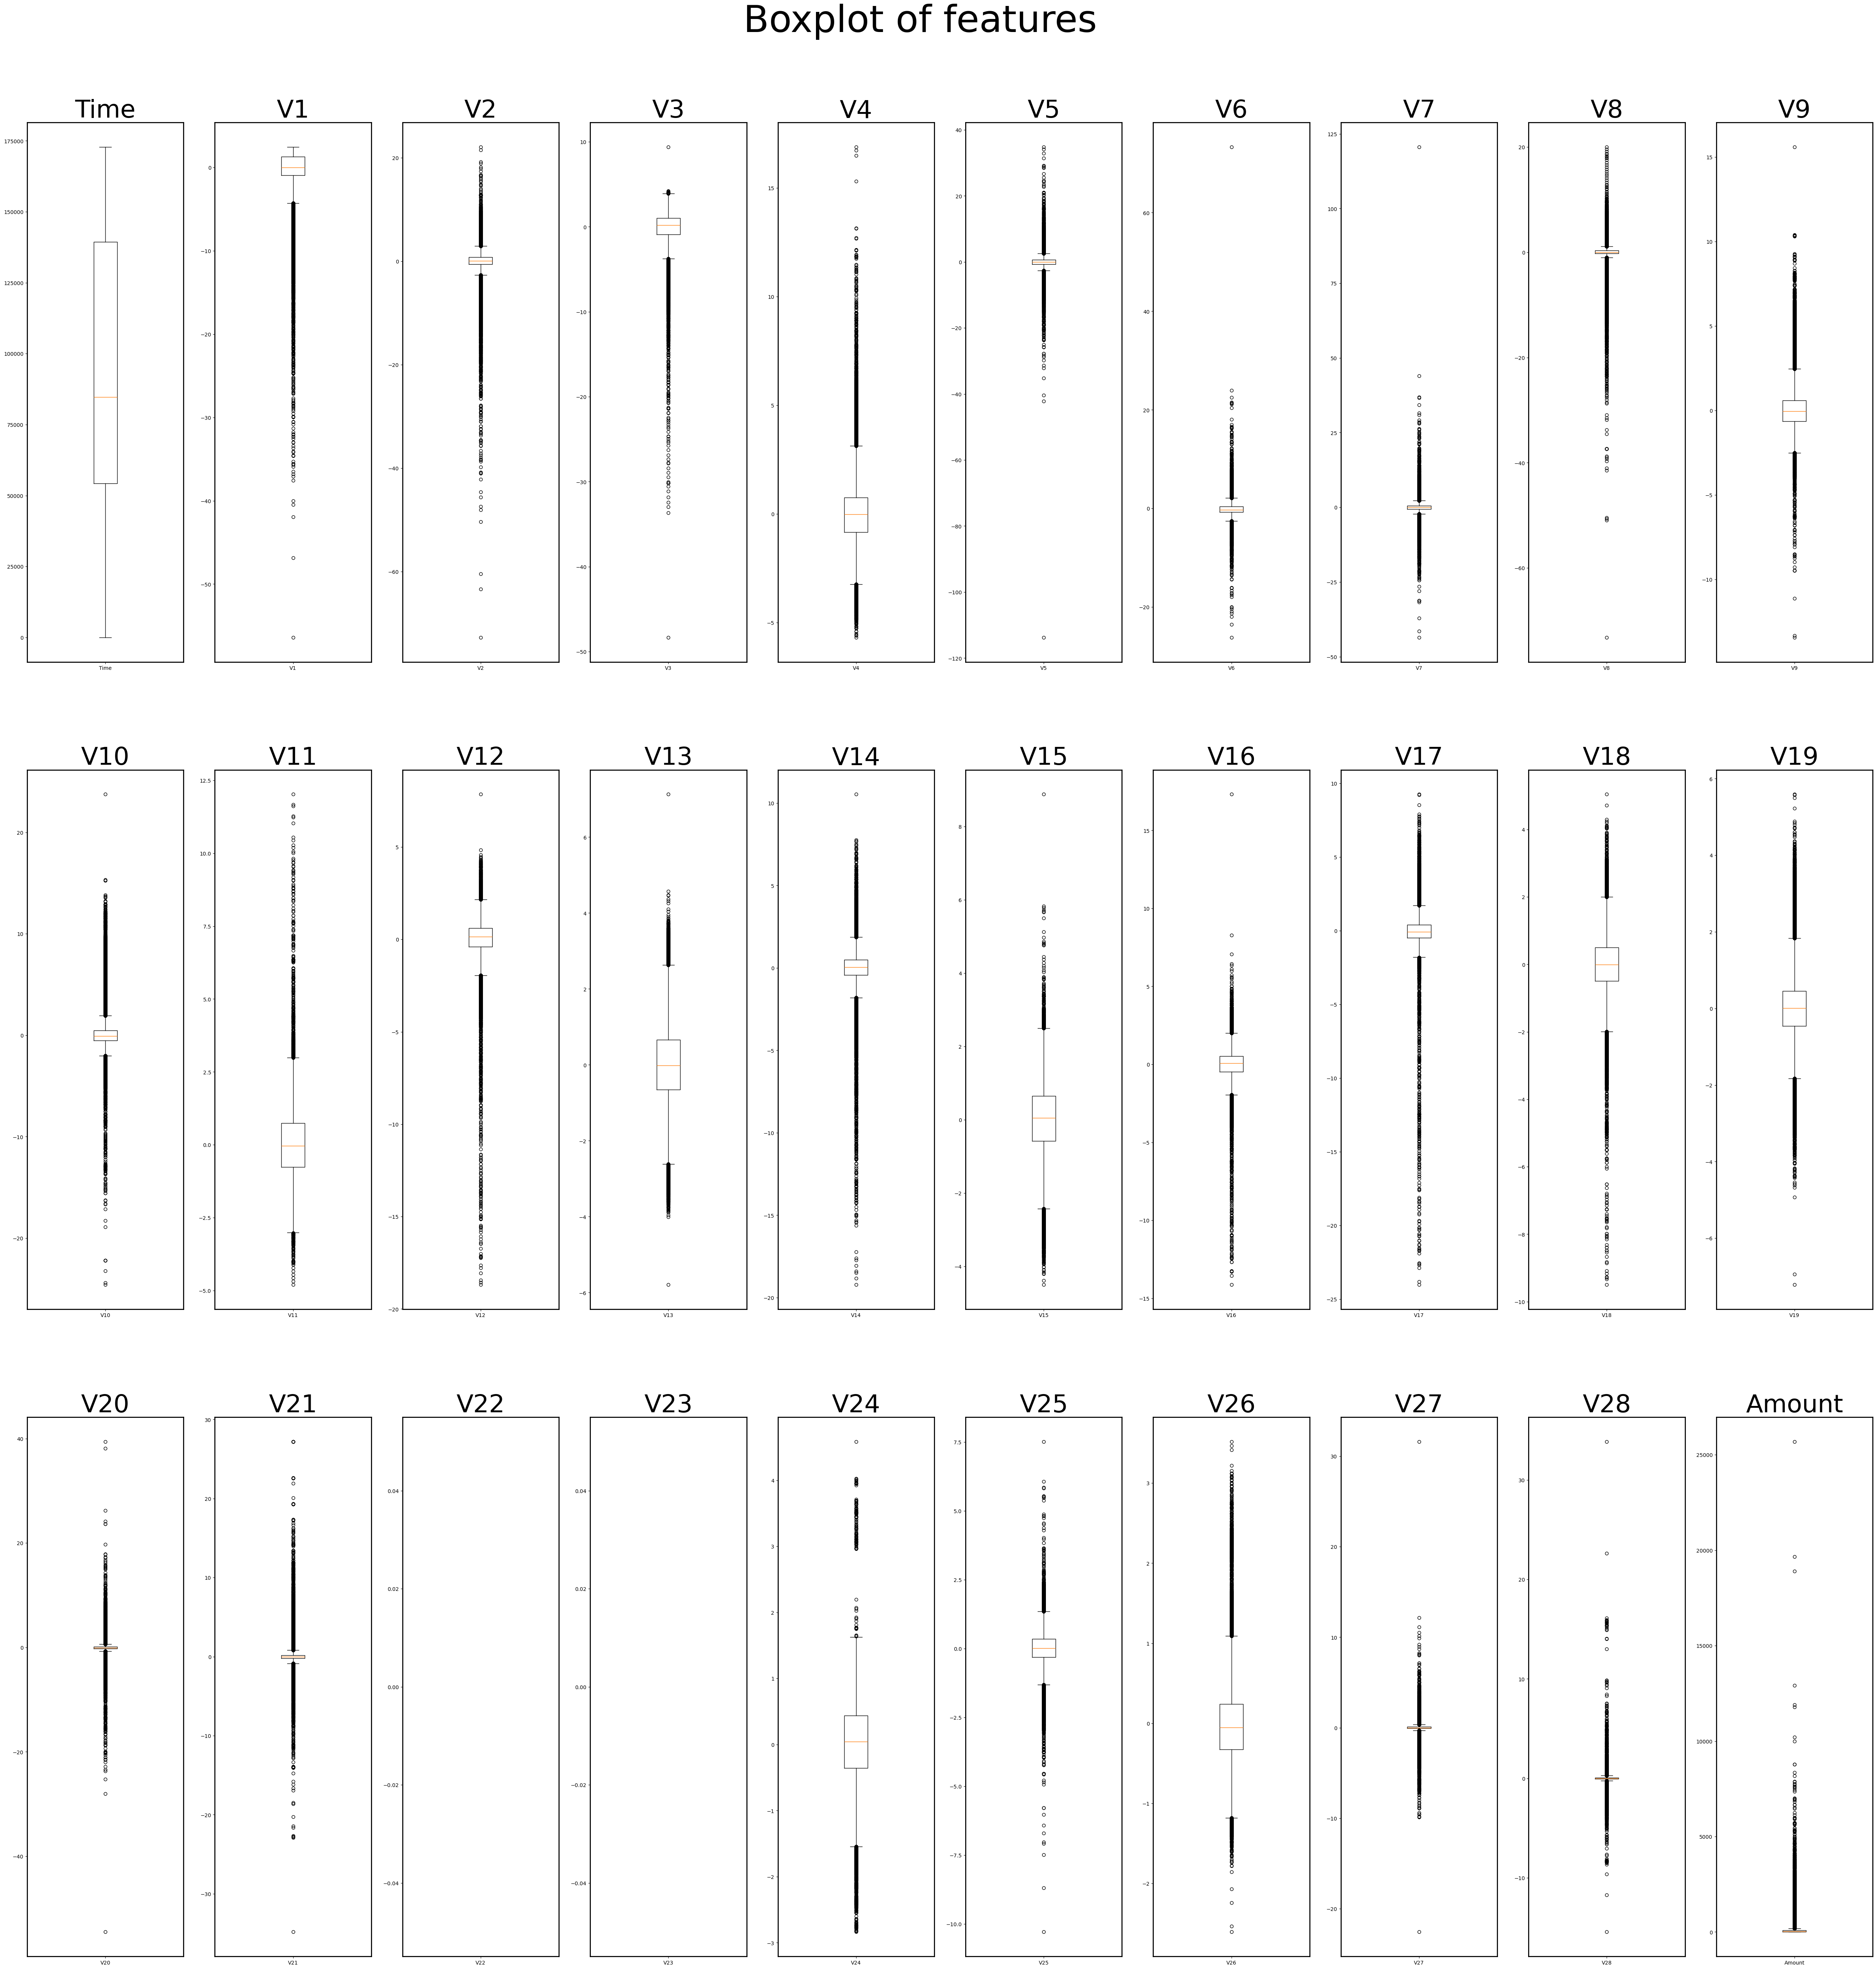

In [6]:
### boxplot for each variable
var_name = df.iloc[:,:-1].columns

fig, ax = plt.subplots(nrows=3, ncols=10, figsize=(64,64))

for row in range(3):
    for col in range(10): 
        ax[row, col].boxplot(
            df.iloc[:,(row*10+col)].to_numpy(),
            tick_labels = [var_name[(row*10+col)]]
        )
        for spine in ax[row, col].spines.values():
            spine.set_linewidth(2)
        ax[row, col].set_title(var_name[(row*10+col)], fontsize = 48)

fig.suptitle("Boxplot of features", fontsize=72, y=0.93)
plt.show()

We could see from visualizations: except time, other features tend to have many outliers.

In [7]:
### Check outlier and compare how it affects fraud class (class 1) (columns description below)
outlierThreshold=1
ExtremeValueThreshold=2.5

df2 = dfNonNull.copy()
outlierPercentage_df = pd.DataFrame()
totalRow = df2.shape[0]
totalFraud = df2[df2["Class"]==1].shape[0]
df2["outliers"] = 0
for col in df2.columns[:-2]:
    Q1 = df2[col].quantile(0.25)
    Q3 = df2[col].quantile(0.75)
    IQR = Q3 - Q1
    outliersCount = df2[((df2[col] > Q3+ExtremeValueThreshold*IQR) | (df2[col] < Q1-ExtremeValueThreshold*IQR))].shape[0]
    outliersFraudCount = df2[((df2[col] > Q3+ExtremeValueThreshold*IQR) | (df2[col] < Q1-ExtremeValueThreshold*IQR)) & (df2["Class"]==1)].shape[0]
    df2.loc[((df2[col] > Q3+ExtremeValueThreshold*IQR) | (df2[col] < Q1-ExtremeValueThreshold*IQR)), "outliers"] += 1
    outlierPercentage_df = outlierPercentage_df._append({
        "features": col,
        "outliersCount": outliersCount,
        "outlierPercentage": outliersCount*100/totalRow,
        "totalOutlier": df2[df2["outliers"]>=outlierThreshold].shape[0],
        "outliersFraudCount": outliersFraudCount,
        "outliersFraudPercentage": outliersFraudCount*100/totalFraud,
        "fraudPercentage": outliersFraudCount*100/outliersCount if outliersCount else 0
    }, ignore_index=True)
outlierPercentage_df = outlierPercentage_df._append({
        "features": "Overall",
        "outliersCount": df2[df2["outliers"]>=outlierThreshold].shape[0],
        "outlierPercentage": df2[df2["outliers"]>=outlierThreshold].shape[0]*100/totalRow,
        "totalOutlier": df2[df2["outliers"]>=outlierThreshold].shape[0],
        "outliersFraudCount": df2[(df2["outliers"]>=outlierThreshold) & (df2["Class"]==1)].shape[0],
        "outliersFraudPercentage": df2[(df2["outliers"]>=outlierThreshold) & (df2["Class"]==1)].shape[0]*100/totalFraud,
        "fraudPercentage": df2[(df2["outliers"]>=outlierThreshold) & (df2["Class"]==1)].shape[0]*100/df2[df2["outliers"]>=outlierThreshold].shape[0]
    }, ignore_index=True)
df2 = df2.drop(columns="outliers")

outlierPercentage_df

,features,outliersCount,outlierPercentage,totalOutlier,outliersFraudCount,outliersFraudPercentage,fraudPercentage
0,Time,0,0.000000,0,0,0.000000,0.000000
1,V1,2887,1.017054,2887,104,23.529412,3.602355
2,V2,6258,2.204616,6751,135,30.542986,2.157239
3,V3,1122,0.395267,6888,183,41.402715,16.310160
4,V4,1247,0.439303,7613,190,42.986425,15.236568
5,V5,3433,1.209403,8950,138,31.221719,4.019808
6,V6,12201,4.298261,19616,51,11.538462,0.417999
7,V7,4071,1.434163,20780,208,47.058824,5.109310
8,V8,13610,4.794634,29866,173,39.140271,1.271124
9,V9,1572,0.553796,30190,120,27.149321,7.633588



**Columns description:**
- "features": feature in the dataset
- "outliersCount": number of outliers found in that feature
- "outlierPercentage": % of outliers found in that feature compared to all transactions(rows) (outliersCount*100/totalRow)
- "totalOutlier": cumulative total of transactions that have at least 1 missing feature value
- "outliersFraudCount": number of outliers which is the fraud class found in that feature
- "outliersFraudPercentage": % of outliers(fraud class) found in that feature compared to all fraud transactions (outliersFraudCount*100/totalFraud)
- "fraudPercentage": % of fraud class in outliers in that feature



**Finding:** Most fraud class transactions are outliers (92.99% for +-IQR*2.5); we should not delete the outlier in every features.

But if we choose +-IQR*2.5 as a threshold for outliers, there are 0 frauds in the V13 and V24 features. So, it is safe to remove rows with outliers in V13 and V24 without affecting the fraud class.


In [8]:
### remove outliers in V13 and V24

ExtremeValueThreshold=2.5

V13Q1 = df2["V13"].quantile(0.25)
V13Q3 = df2["V13"].quantile(0.75)
V13IQR = V13Q3-V13Q1
V24Q1 = df2["V24"].quantile(0.25)
V24Q3 = df2["V24"].quantile(0.75)
V24IQR = V24Q3-V24Q1

df3 = df2[((df2["V13"] <= V13Q3+ExtremeValueThreshold*V13IQR) & (df2["V13"] >= V13Q1-ExtremeValueThreshold*V13IQR)) & ((df2["V24"] <= V24Q3+ExtremeValueThreshold*V24IQR) & (df2["V24"] >= V24Q1-ExtremeValueThreshold*V24IQR))].copy()
print(f'total transaction: {df3.shape[0]}')
print(f'total fraud: {df3[df3["Class"]==1].shape[0]}')
print(f'removed {df2.shape[0] - df3.shape[0]} transactions with {df2[df2["Class"]==1].shape[0] - df3[df3["Class"]==1].shape[0]} fraud records')

total transaction: 283602
total fraud: 442
removed 257 transactions with 0 fraud records



257 observations are removed due to the outlier criteria, and 283,602 observations remain for further analysis


### Module 2: Data Visualization
What are the distributions of the variables? Are there differences in the distributions between the Fraud group and the Normal group?

In [9]:
### separate fraud and non-fraud (normal)
df3Fraud = df3[df3["Class"]==1].copy()
df3NonFraud = df3[df3["Class"]==0].copy()

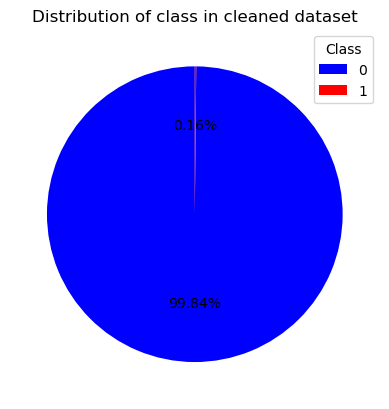

In [10]:
# plot pie chart of distribution
plt.pie([df3NonFraud.shape[0],df3Fraud.shape[0]], autopct='%1.2f%%', startangle=90, colors=["blue", "red"])
plt.legend(title="Class", labels=[0,1])
plt.title("Distribution of class in cleaned dataset")
plt.show()


**Finding:** The dataset is very unbalanced. Class 1 is only 0.16% of all data.
- Our class comparison visualization should be based on density.
- We should resample the dataset before training the models.


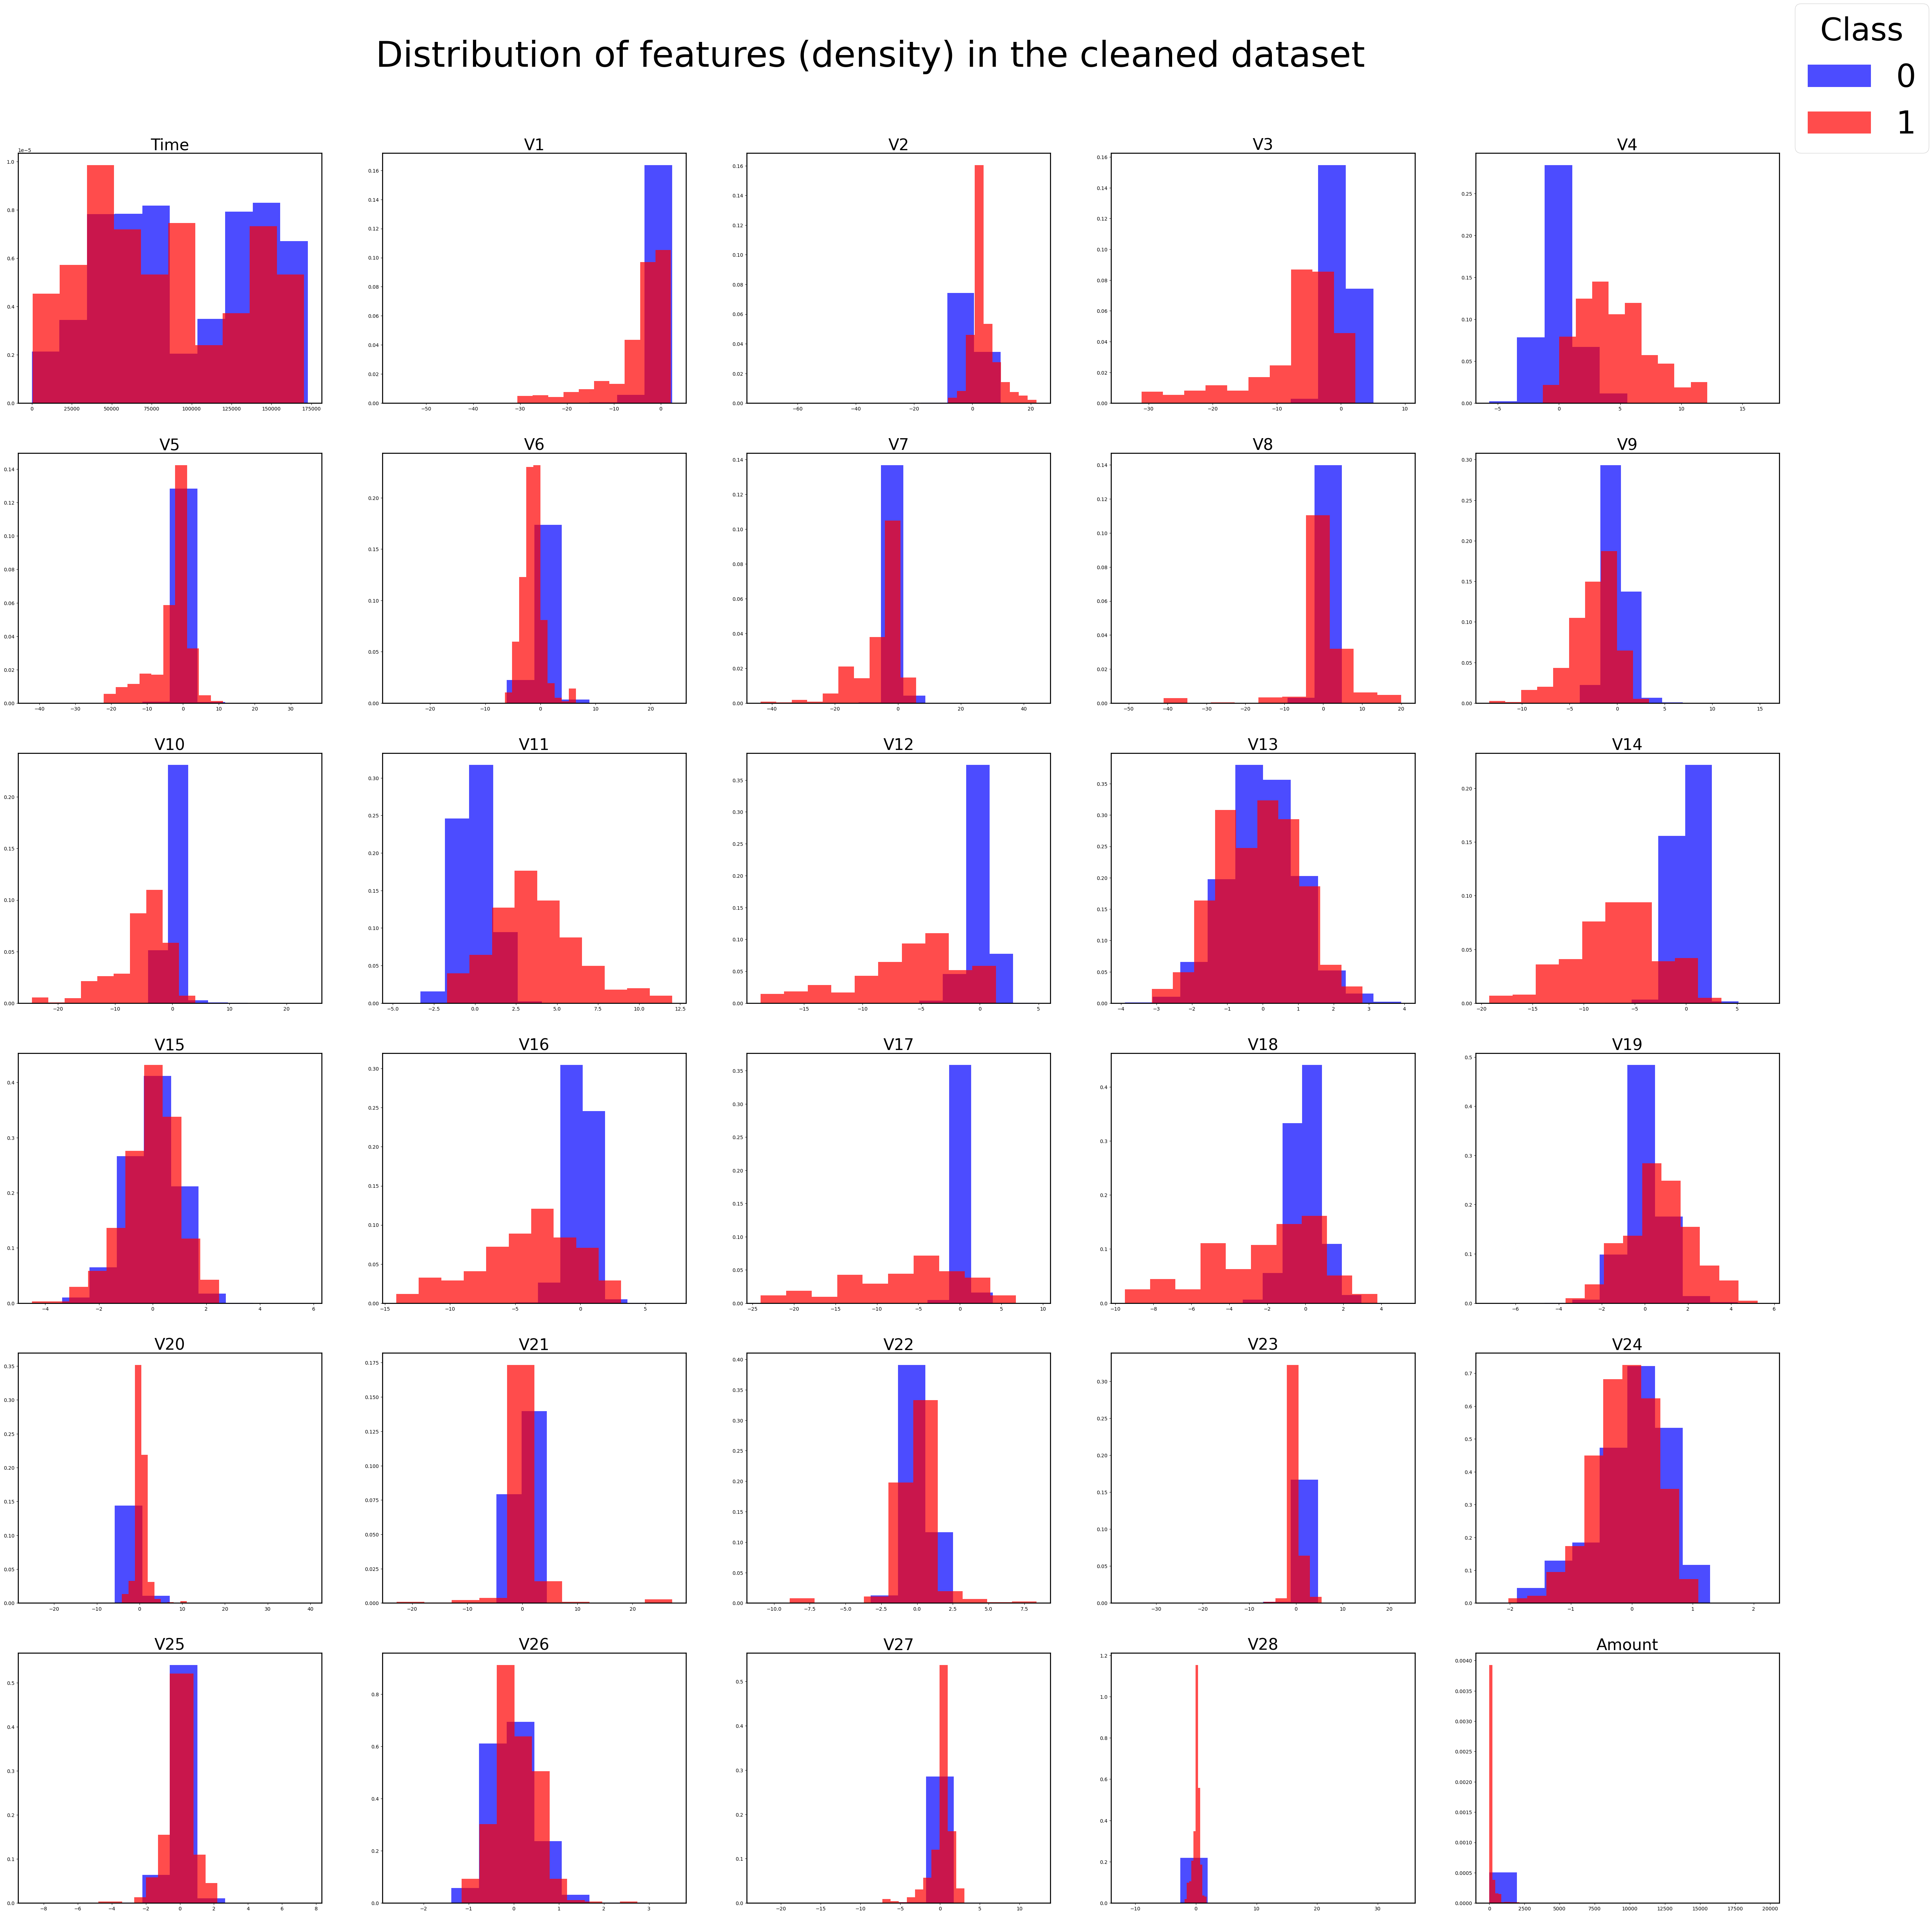

In [11]:
### Histogram plot
features = df3.iloc[:,:-1].columns

fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(64,64))

for row in range(6):
    for col in range(5):
        ax[row, col].hist(df3NonFraud[features[(row*5+col)]], density=True, bins=10, color="blue", alpha=0.7, label=0)
        ax[row, col].hist(df3Fraud[features[(row*5+col)]], density=True, bins=10, color="red", alpha=0.7, label=1)
        ax[row, col].set_title(features[(row*5+col)], fontsize = 32)
        for spine in ax[row, col].spines.values():
            spine.set_linewidth(2)

ax[0,4].legend(title="Class", loc='center left', fontsize=64, title_fontsize=64, bbox_to_anchor=(1, 1.3))
plt.suptitle("Distribution of features (density) in the cleaned dataset", fontsize=72, y=0.93)
plt.show()


**Finding:** We spot that in V3, V4, V10, V11, V12, V14, V16, V17, and V18: classes 0 and 1 have visibly different distribution patterns.
And (V4, V11) and (V12, V16) pairs have approximately the same pattern in the same class, we will scatter plot these pairs for more exploration.


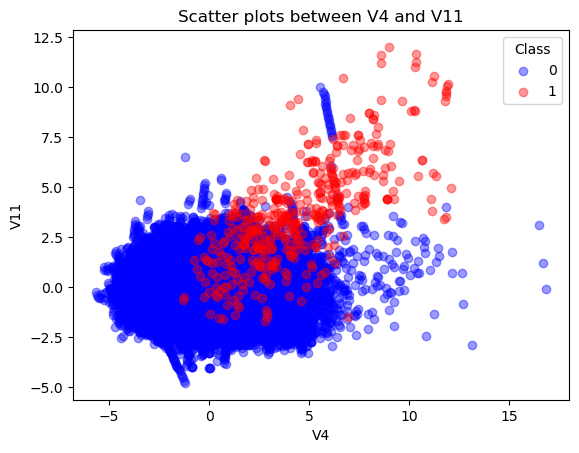

In [12]:
# Scatter plots between V4 and V11
plt.scatter(df3NonFraud["V4"], df3NonFraud["V11"], alpha=0.4, label=0, c="blue")
plt.scatter(df3Fraud["V4"], df3Fraud["V11"], alpha=0.4, label=1, c="red")
plt.xlabel("V4")
plt.ylabel("V11")
plt.legend(title="Class")
plt.title("Scatter plots between V4 and V11")
plt.show()

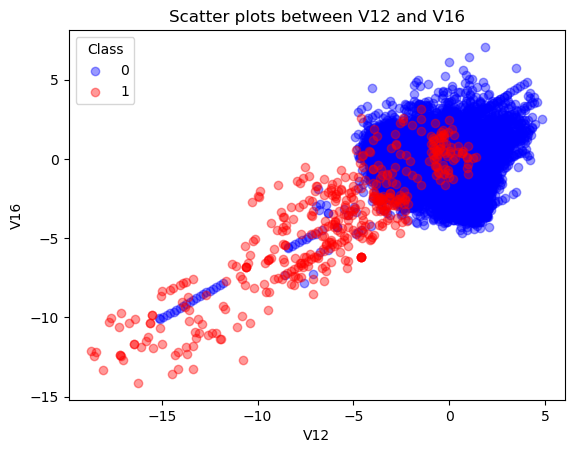

In [13]:
# Scatter plots between V12 and V16
plt.scatter(df3NonFraud["V12"], df3NonFraud["V16"], alpha=0.4, label=0, c="blue")
plt.scatter(df3Fraud["V12"], df3Fraud["V16"], label=1, alpha=0.4,c="red")
plt.xlabel("V12")
plt.ylabel("V16")
plt.legend(title="Class")
plt.title("Scatter plots between V12 and V16")
plt.show()


**Finding:** In both pairs, we can see from the scatter plots that regions from both classes still have intercept areas; algorithms like KNeighborsClassifier may not work well with this dataset, so we may consider more complex algorithms.


### Module 3: Dimension Reduction
Utilize unsupervised learning techniques to perform dimensionality reduction on the dataset.

In [14]:
### prepare X_train
X_train = np.array(df3.iloc[:,:-1])
X_trainColumns = df3.iloc[:,:-1].columns
X_train.shape

(283602, 30)

In [15]:
### prepare Y_train
Y_train = np.array(df3.iloc[:,-1])
Y_train.shape

(283602,)


We decide to test 2 dimension reduction methods on how it will improve the model performance. So we make 3 datasets from 3 approaches:

1. Univariate feature selection (UFS) works by selecting the best features based on univariate statistical tests (scikit-learn.org, 2024).
We will choose the best 10 features that perform the most f_classif score in the test. (We will call this approach "UFS")

2. Principal component analysis (PCA) which PCA is fundamentally a dimensionality reduction algorithm we have learned in class. We will reduce it to 10 features. (We will call this approach "PCA")

3. Use the original cleaned dataset as a control dataset. (We will call this approach "None")


In [16]:
### Univariate feature selection (UFS) 
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest with f_classif
select_k_best = SelectKBest(score_func=f_classif, k=10)
X_train_k_best = select_k_best.fit_transform(X_train, Y_train)

selected_features = df3.iloc[:,:-1].columns[select_k_best.get_support()]

print("Selected features:", list(selected_features))

# get x_train 
X_UFS_train = np.array(df3.loc[:,selected_features])

Selected features: ['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'V18']



**Finding:** All features we spot the different patterns between classes (from histograms in module 2) are in the selected features result!


In [17]:
# check if we got 10 features
X_UFS_train.shape

(283602, 10)

In [18]:
### Principal component analysis (PCA)
from sklearn.decomposition import PCA 
PCA_model = PCA(n_components=10)
PCA_model.fit(X_train) 

# get x_train 
X_PCA_train = PCA_model.transform(X_train)

In [19]:
# check if we got 10 features
X_PCA_train.shape

(283602, 10)

### Module 4: Classification
Select three classification methods and create classification models using 5-fold cross-validation. Next, we load `creditcard_test.csv` to serve as the test dataset for evaluating models and comparing their performance.<br>

Due to the dataset's significant imbalance, We considered undersampling for model training and fitting.

In [20]:
###import classification methods
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


We choose LogisticRegression (LR), DecisionTreeClassifier (DTC), and RandomForestClassifier (RFC) to be tested in this project.


In [21]:
# import evaluation metrics modules
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

In [22]:
### Under sampling with Random UnderSampler (RUS)

from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
rus = RandomUnderSampler(random_state=0)

X_UFS_resampled, Y_UFS_resampled = rus.fit_resample(X_UFS_train, Y_train) #undersample in UFS dataset (dimension reduction method: UFS)
X_PCA_resampled, Y_PCA_resampled = rus.fit_resample(X_PCA_train, Y_train) #undersample in PCA dataset (dimension reduction method: PCA)
X_resampled, Y_resampled = rus.fit_resample(X_train, Y_train) #undersample in the original cleaned dataset (dimension reduction method: None)

list(Counter(Y_resampled).items())[0][1]
print(f"Class count\n0: {list(Counter(Y_resampled).items())[0][1]}\n1: {list(Counter(Y_resampled).items())[1][1]}")

Class count
0: 442
1: 442


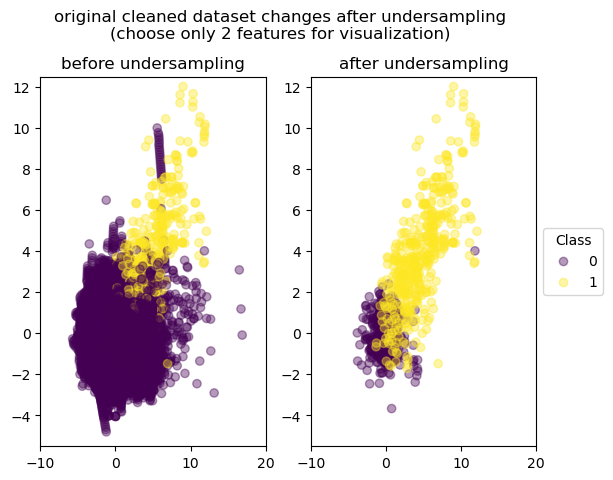

In [23]:
#visualization changes after undersampling on the original cleaned dataset
fig, ax = plt.subplots(ncols=2)

ax[0].scatter(X_train[:,4], X_train[:,11], c=Y_train, alpha=0.4)
ax[0].set_xlim(-10, 20)
ax[0].set_ylim(-5.5, 12.5)
ax[0].set_title("before undersampling")

scatter2 = ax[1].scatter(X_resampled[:,4], X_resampled[:,11], c=Y_resampled, alpha=0.4)
ax[1].set_xlim(-10, 20)
ax[1].set_ylim(-5.5, 12.5)
ax[1].set_title("after undersampling")

handles2, labels2 = scatter2.legend_elements()
ax[1].legend(handles2, labels2, title="Class", loc='center left', bbox_to_anchor=(1, 0.5))

fig.suptitle("original cleaned dataset changes after undersampling\n(choose only 2 features for visualization)", y=1.02)
plt.show()

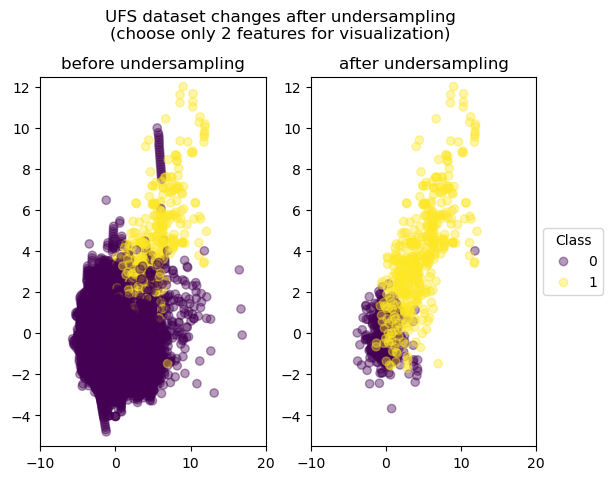

In [24]:
#visualization changes after undersampling on the UFS dataset
fig, ax = plt.subplots(ncols=2)

ax[0].scatter(X_UFS_train[:,1], X_UFS_train[:,4], c=Y_train, alpha=0.4)
ax[0].set_xlim(-10, 20)
ax[0].set_ylim(-5.5, 12.5)
ax[0].set_title("before undersampling")

scatter2 = ax[1].scatter(X_UFS_resampled[:,1], X_UFS_resampled[:,4], c=Y_UFS_resampled, alpha=0.4)
ax[1].set_xlim(-10, 20)
ax[1].set_ylim(-5.5, 12.5)
ax[1].set_title("after undersampling")

handles2, labels2 = scatter2.legend_elements()
ax[1].legend(handles2, labels2, title="Class", loc='center left', bbox_to_anchor=(1, 0.5))

fig.suptitle("UFS dataset changes after undersampling\n(choose only 2 features for visualization)", y=1.02)
plt.show()

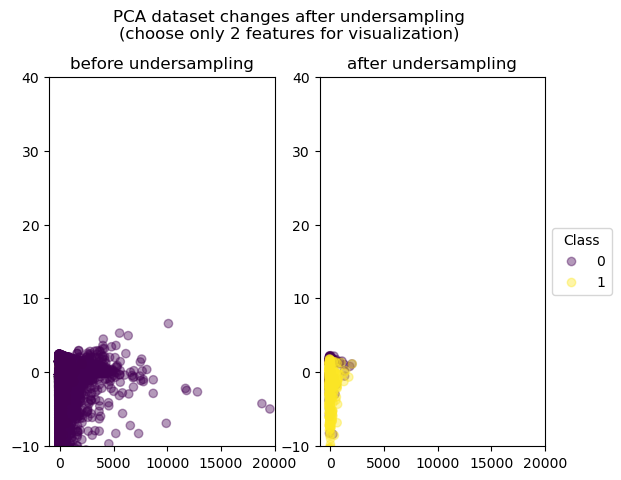

In [25]:
#visualization changes after undersampling on the PCA dataset
fig, ax = plt.subplots(ncols=2)

ax[0].scatter(X_PCA_train[:,1], X_PCA_train[:,2], c=Y_train, alpha=0.4)
ax[0].set_xlim(-1000, 20000)
ax[0].set_ylim(-10, 40)
ax[0].set_title("before undersampling")

scatter2 = ax[1].scatter(X_PCA_resampled[:,1], X_PCA_resampled[:,2], c=Y_PCA_resampled, alpha=0.4)
ax[1].set_xlim(-1000, 20000)
ax[1].set_ylim(-10, 40)
ax[1].set_title("after undersampling")

handles2, labels2 = scatter2.legend_elements()
ax[1].legend(handles2, labels2, title="Class", loc='center left', bbox_to_anchor=(1, 0.5))

fig.suptitle("PCA dataset changes after undersampling\n(choose only 2 features for visualization)", y=1.02)
plt.show()


**Finding:** We can see from visualizations that non-fraud transactions (purple dot) has been reduced to the same number as fraud transactions. We are ready to train models.

Next, We will experiment to find the best dimension reduction method for each classifier algorithm by doing the 5-fold cross-validation on different classifier algorithms and dimension reduction methods. We will assess it by evaluation metrics: accuracy, recall, precision, and f1-score.


In [26]:
### initialize models
LR = LogisticRegression(solver="liblinear", random_state=0)
DTC = DecisionTreeClassifier(random_state=0)
RFC = RandomForestClassifier(random_state=0)

In [27]:
### 5-fold cross-validation on different classifier algorithms and dimension reduction methods
from sklearn.model_selection import cross_val_score

cv_score = pd.DataFrame()

for algoName, model in zip(["LR", "DTC", "RFC"], [LR, DTC, RFC]):
    for dimenReducName, dataset in zip(["UFS", "PCA", "None"], [(X_UFS_resampled, Y_UFS_resampled), (X_PCA_resampled, Y_PCA_resampled), (X_resampled, Y_resampled)]):
        cv_score = cv_score._append(
            {
            "algorithm": algoName,
            "dimensionReduction": dimenReducName,
            "resample": "RUS"
            }|{score:cross_val_score(model, dataset[0], dataset[1], cv=5, scoring=score).mean() for score in ["accuracy", "recall", "precision", "f1"]}, 
            ignore_index=True
        )
        print(f'algorithm: {algoName}, dimension reduction: {dimenReducName} Done')

algorithm: LR, dimension reduction: UFS Done
algorithm: LR, dimension reduction: PCA Done
algorithm: LR, dimension reduction: None Done
algorithm: DTC, dimension reduction: UFS Done
algorithm: DTC, dimension reduction: PCA Done
algorithm: DTC, dimension reduction: None Done
algorithm: RFC, dimension reduction: UFS Done
algorithm: RFC, dimension reduction: PCA Done
algorithm: RFC, dimension reduction: None Done


In [28]:
### experiment results
cv_score

,algorithm,dimensionReduction,resample,accuracy,recall,precision,f1
0,LR,UFS,RUS,0.935516,0.895991,0.972855,0.932660
1,LR,PCA,RUS,0.897047,0.909499,0.892269,0.898182
2,LR,None,RUS,0.919614,0.882406,0.954652,0.915137
3,DTC,UFS,RUS,0.895910,0.895991,0.897129,0.895467
4,DTC,PCA,RUS,0.826644,0.748391,0.868780,0.780747
5,DTC,None,RUS,0.891403,0.891547,0.892096,0.890788
6,RFC,UFS,RUS,0.928749,0.896042,0.959436,0.926146
7,RFC,PCA,RUS,0.912853,0.882354,0.940499,0.909196
8,RFC,None,RUS,0.929860,0.891522,0.965813,0.926811


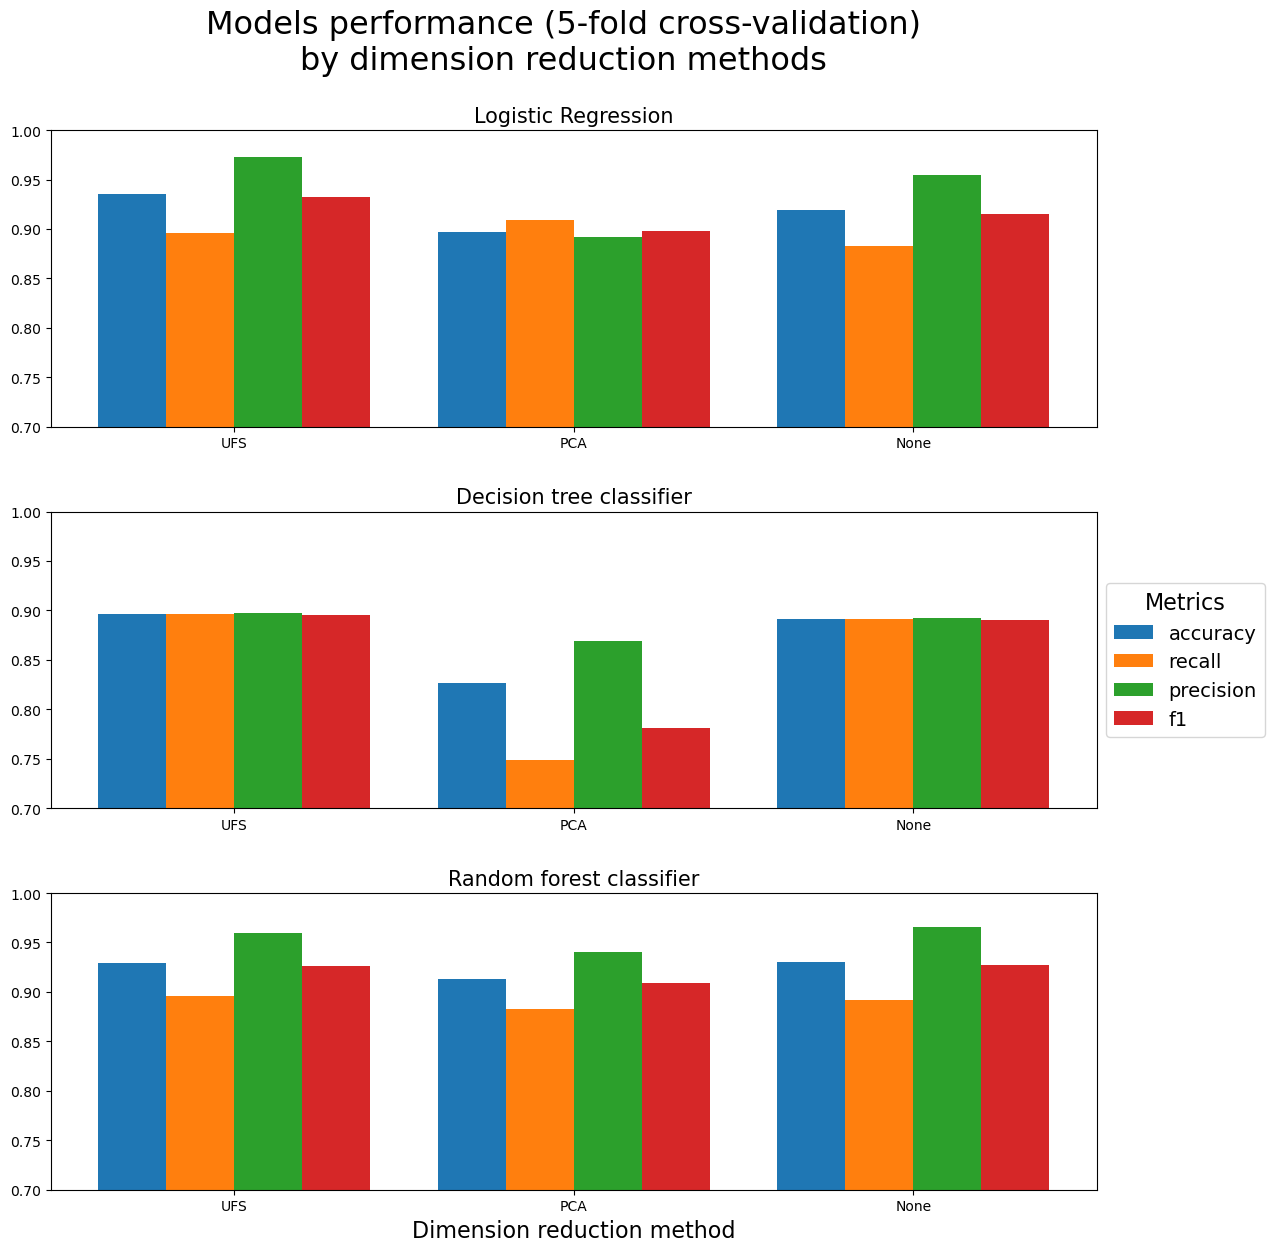

In [29]:
### Plot experiment results
fig, ax = plt.subplots(nrows=3, figsize=(12,12))
fig.tight_layout(pad=4)

x_axis = np.arange(3)  # the label locations
width = 0.25  # the width of the bars

models = ["LR", "DTC", "RFC"]
models_fullname = ["Logistic Regression", "Decision tree classifier", "Random forest classifier"]

for i in range(3):
    model_score = cv_score[cv_score["algorithm"]==models[i]].copy().reset_index(drop=True)
    for scorer, offset in zip(["accuracy", "recall", "precision", "f1"], [-0.3,-0.1,0.1,0.3]):
        ax[i].bar(
            x_axis + offset, 
            model_score.loc[x_axis,scorer],
            width = 0.2,
            label = scorer
        )
        ax[i].set_ylim(0.7,1)
        ax[i].set_xticks(x_axis,["UFS", "PCA", "None"])
        ax[i].set_title(models_fullname[i], fontsize=15)
        
ax[1].legend(title="Metrics", title_fontsize=16, fontsize=14, loc='center left', bbox_to_anchor=(1, 0.5))
ax[2].set_xlabel("Dimension reduction method", fontsize=16)

fig.suptitle('Models performance (5-fold cross-validation)\nby dimension reduction methods', y=1.05, fontsize=23)
plt.show()


**Finding:** Since this is a fraud detection problem, the recall score is considered as the most valuable evaluation metric, followed by the accuracy score. In fraud detection, it is better to detect all fraud transactions regardless of false positives than to let some fraud transactions happen. And for the accuracy score is the evaluation metric that we learned from the class, it can show briefly how good model performed.

From the 5-fold cross-validation results, we can conclude that the UFS dimension reduction method gave the best result for every classification algorithm we have tested. It gave the highest recall and accuracy score in every algorithm (except the recall score in logistic regression, which is approximately similar to PCA, which is acceptable).



Then, we train every algorithm with the whole undersampled UFS train dataset to prepare for predicting the test dataset.


In [30]:
### Train models with UFS dataset
LR2 = LogisticRegression(solver="liblinear", random_state=0)
LR2.fit(X_UFS_resampled, Y_UFS_resampled)

DTC2 = DecisionTreeClassifier(random_state=0)
DTC2.fit(X_UFS_resampled, Y_UFS_resampled)

RFC2 = RandomForestClassifier(random_state=0)
RFC2.fit(X_UFS_resampled, Y_UFS_resampled)

RandomForestClassifier(random_state=0)

In [31]:
### Load test dataset
testdf = pd.read_csv("creditcard_test.csv")
testdf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,40086,1.083693,1.179501,-1.346150,1.998824,0.818034,-0.771419,0.230307,0.093683,-0.167594,...,-0.312000,-0.639700,-0.120249,-0.180218,0.609283,-0.339524,0.096701,0.114972,1.00,1
1,93860,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,-3.683242,...,2.541637,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,78.00,1
2,14152,-4.710529,8.636214,-15.496222,10.313349,-4.351341,-3.322689,-10.788373,5.060381,-5.689311,...,1.990545,0.223785,0.554408,-1.204042,-0.450685,0.641836,1.605958,0.721644,1.00,1
3,27219,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,99.99,1
4,84204,-1.927453,1.827621,-7.019495,5.348303,-2.739188,-2.107219,-5.015848,1.205868,-4.382713,...,1.376938,-0.792017,-0.771414,-0.379574,0.718717,1.111151,1.277707,0.819081,512.25,1


In [32]:
### Dimension reduce test set with UFS selected features filtering.
X_test = np.array(testdf[selected_features])
print("X_test shape:", X_test.shape)
Y_test = np.array(testdf["Class"])
print("Y_test shape:", Y_test.shape)

X_test shape: (150, 10)
Y_test shape: (150,)


In [33]:
### Predict test dataset by trained models
LR2_pred = LR2.predict(X_test)
DTC2_pred = DTC2.predict(X_test)
RFC2_pred = RFC2.predict(X_test)

accuracy score: 0.9533333333333334
recall score: 0.94


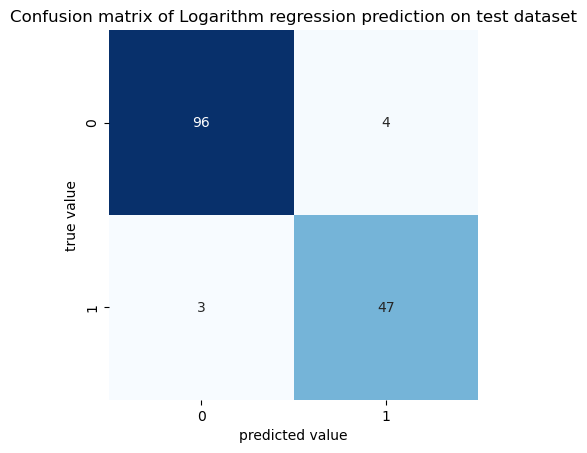

In [34]:
# Prediction result from Logarithm regression model
LR2_acc = accuracy_score(Y_test, LR2_pred)
LR2_recall = recall_score(Y_test, LR2_pred)
print(f'accuracy score: {LR2_acc}')
print(f'recall score: {LR2_recall}')
mat = confusion_matrix(Y_test, LR2_pred)
sns.heatmap(mat, square=True, annot=True, cmap="Blues" ,cbar=False)
plt.title('Confusion matrix of Logarithm regression prediction on test dataset')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

**Finding:** LR model correctly detected 47 out of a total of 50 fraud transactions in the test set.


accuracy score: 0.94
recall score: 0.96


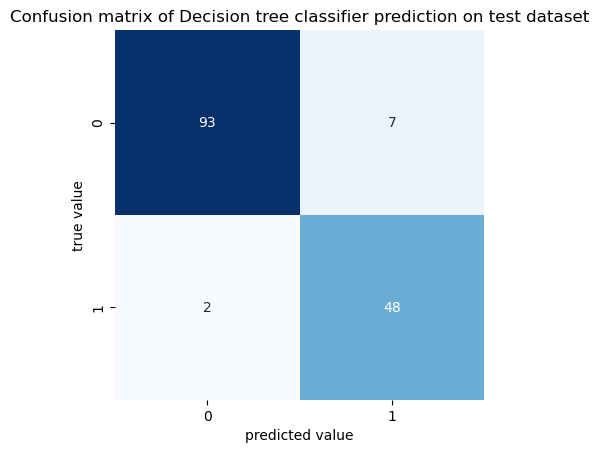

In [35]:
# Prediction result from Decision tree classifier model
DTC2_acc = accuracy_score(Y_test, DTC2_pred)
DTC2_recall = recall_score(Y_test, DTC2_pred)
print(f'accuracy score: {DTC2_acc}')
print(f'recall score: {DTC2_recall}')
mat = confusion_matrix(Y_test, DTC2_pred)
sns.heatmap(mat, square=True, annot=True, cmap="Blues" ,cbar=False)
plt.title('Confusion matrix of Decision tree classifier prediction on test dataset')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

**Finding:** DTC model correctly detected 48 out of a total of 50 fraud transactions in the test set.


accuracy score: 0.9533333333333334
recall score: 0.94


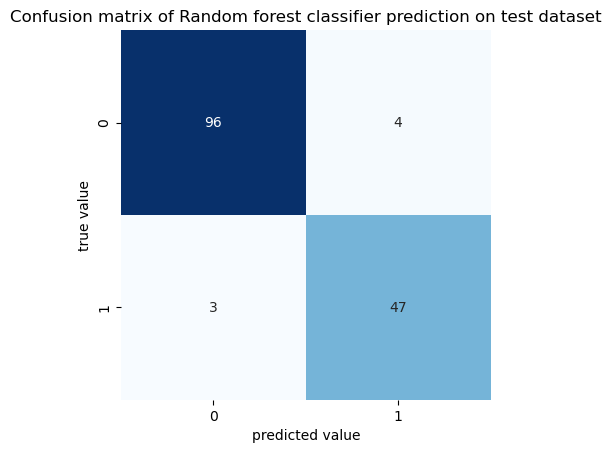

In [36]:
# Prediction result from Random forest classifier model
RFC2_acc = accuracy_score(Y_test, RFC2_pred)
RFC2_recall = recall_score(Y_test, RFC2_pred)
print(f'accuracy score: {RFC2_acc}')
print(f'recall score: {RFC2_recall}')
mat = confusion_matrix(Y_test, RFC2_pred)
sns.heatmap(mat, square=True, annot=True, cmap="Blues" ,cbar=False)
plt.title('Confusion matrix of Random forest classifier prediction on test dataset')
plt.xlabel('predicted value')
plt.ylabel('true value')
plt.show()

**Finding:** RFC model correctly detected 47 out of a total of 50 fraud transactions in the test set.


In [37]:
### evaluation metrics by models
conclusion = pd.DataFrame([
    {"algorithm":"Logistic regression", "accuracy": LR2_acc, "recall": LR2_recall},
    {"algorithm":"Decision tree classifier", "accuracy": DTC2_acc, "recall": DTC2_recall},
    {"algorithm":"Random forest classifier", "accuracy": RFC2_acc, "recall": RFC2_recall}
]).set_index("algorithm")
conclusion

,accuracy,recall
algorithm,,
Logistic regression,0.953333,0.94
Decision tree classifier,0.940000,0.96
Random forest classifier,0.953333,0.94


### Module 5: Summary
Summarize findings and draw conclusions.

This project has tested 2 methods of dimension reduction: Univariate feature selection (using the f_classif scorer function) and Principal component analysis to reduce it to 10 features. Evaluating mainly by recall and accuracy scores, we found that UFS gave the best model results on 5-fold cross-validation on the train set.

Then, we tested 3 classifier algorithms: Logistic regression, Decision tree classifier, and Random forest classifier.
We use UFS to dimensionally reduce the training dataset, train models, and evaluate the model on the test set; the decision tree classifier gave the best recall score (0.96), followed by the rest (both gave 0.94). The Logistic regression and Random forest classifier gave the highest accuracy score (0.95), slightly more than the Decision tree classifier's (0.94).

If we consider the fraud detection problem, the recall score should be considered more important because it's better to detect all fraud if possible. Therefore, Decision tree classifier had the best performance in fraud detection in this project.

In [38]:
conclusion

,accuracy,recall
algorithm,,
Logistic regression,0.953333,0.94
Decision tree classifier,0.940000,0.96
Random forest classifier,0.953333,0.94
